## Imports

In [1]:
%%capture
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
from collections import defaultdict
from statistics import mean
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

%pip install transformers
from transformers import pipeline
from collections import Counter

## Load data

In [2]:
# Download NLTK resources if not already downloaded
nltk.download('vader_lexicon')
# Read the dataset text file
file_path = './content/Little-Prince-Antoine-De-Saint-Exupéry-Z-Library.txt'
with open(file_path, 'r',encoding='utf-8') as file:
    data = file.read()

In [3]:
print(data)

The Little Prince


[Illustrated Edition]



By



Antoine de Saint-Exupéry



Translated by

Katherine Woods



Illustrated & Re-Produced by

A. Saint-Exupéry & Murat Ukray





ILLUSTRATED &

PUBLISHED BY

e-KİTAP PROJESİ & CHEAPEST BOOKS



www.cheapestboooks.com

www.facebook.com/EKitapProjesi



Copyright, 2015 by e-Kitap Projesi

Istanbul

ISBN: 978-605-2259-023





All rights reserved. No part of this book shell be reproduced or transmitted in any form or by any means, electronic or mechanical, including photocopy, recording or by any information or retrieval system, without written permission form the publisher.





Contents











Antoine de Saint-Exupéry




Antoine de Saint-Exupéry, officially Antoine Marie Jean-Baptiste Roger, comte de Saint Exupéry (29 June 1900 – 31 July 1944) was a French aristocrat, writer, poet, and pioneering aviator. He became a laureate of several of France's highest literary awards and also won the U.S. National Book Award. He is best remembe

## Preprocess

In [4]:
# Assuming the text file is read into the variable 'data' as mentioned earlier
chapters = {}  # Dictionary to store chapters
for i in range(1, 24):  # Loop from 1 to 23
    chapter_marker = f"Chapter {i}"  # Create the chapter marker string
    start_index = data.find(chapter_marker)  # Find the starting index of the chapter
    if start_index != -1:
        end_index = data.find(f"Chapter {i + 1}")  # Find the end index of the chapter
        if end_index == -1:
            chapter = data[start_index:]  # If it's the last chapter, consider until the end
        else:
            chapter = data[start_index:end_index]  # Extract the chapter text
        chapters[f"Chapter {i}"] = chapter  # Store the chapter in the dictionary

# Print or display individual chapters
for chapter, text in chapters.items():
    print(f"*** {chapter} ***")
    print(text)


*** Chapter 1 ***
Chapter 1


“we are introduced to the narrator, a pilot, and his ideas about grown-ups.”





Once when I was six years old I saw a magnificent picture in a book, called True Stories from Nature, about the primeval forest. It was a picture of a boa constrictor in the act of swallowing an animal. Here is a copy of the drawing.

In the book it said: "Boa constrictors swallow their prey whole, without chewing it. After that they are not able to move, and they sleep through the six months that they need for digestion."

I pondered deeply, then, over the adventures of the jungle. And after some work with a colored pencil I succeeded in making my first drawing. My Drawing Number One. It looked like this:





I showed my masterpiece to the grown-ups, and asked them whether the drawing frightened them.

But they answered: "Frighten? Why should any one be frightened by a hat?"

My drawing was not a picture of a hat. It was a picture of a boa constrictor digesting an elephant.

In [18]:

import nltk
nltk.download('stopwords')

def preprocess_text_advanced(text):
    text = text.lower()  # Convert text to lowercase
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

chapters = {}
chapter_marker = "Chapter "
chapter_count = 1
start_index = 0

while True:
    chapter_start = data.find(chapter_marker, start_index)
    if chapter_start == -1:
        break
    chapter_end = data.find(chapter_marker, chapter_start + 1)
    if chapter_end == -1:
        chapter_end = len(data)

    chapter_text = data[chapter_start:chapter_end].strip()
    chapters[f"Chapter-{chapter_count}"] = chapter_text
    chapter_count += 1
    start_index = chapter_end

# Preprocess each chapter and store in preprocessed_chapters dictionary
preprocessed_chapters = {}
for chapter_title, chapter_text in chapters.items():
    preprocessed_chapters[chapter_title] = preprocess_text_advanced(chapter_text)

# Display preprocessed text for all chapters
for chapter, text in preprocessed_chapters.items():
    print(f"*** {chapter} ***")
    print(text)


*** Chapter-1 ***
chapter 1 “we introduced narrator pilot ideas grownups” six years old saw magnificent picture book called true stories nature primeval forest picture boa constrictor act swallowing animal copy drawing book said boa constrictors swallow prey whole without chewing able move sleep six months need digestion pondered deeply adventures jungle work colored pencil succeeded making first drawing drawing number one looked like showed masterpiece grownups asked whether drawing frightened answered frighten one frightened hat drawing picture hat picture boa constrictor digesting elephant since grownups able understand made another drawing drew inside boa constrictor grownups could see clearly always need things explained drawing number two looked like grownups response time advise lay aside drawings boa constrictors whether inside outside devote instead geography history arithmetic grammar age six gave might magnificent career painter disheartened failure drawing number one drawin

# **chunk size estimate**

##Making chunks so the model can easily/better analyse the emotion present in chapter (chunk-wise)

In [19]:
import nltk
nltk.download('punkt')

words_per_chapter = {}

# Calculate total words for each chapter
for chapter_title, chapter_text in chapters.items():
    preprocessed_text = preprocess_text_advanced(chapter_text)
    tokens = preprocessed_text.split()  # Simple tokenization
    word_count = len(tokens)
    words_per_chapter[chapter_title] = word_count

# Display total words for each chapter
for chapter_title, word_count in words_per_chapter.items():
    print(f"Chapter '{chapter_title}' - Total Words: {word_count}")


Chapter 'Chapter-1' - Total Words: 244
Chapter 'Chapter-2' - Total Words: 335
Chapter 'Chapter-3' - Total Words: 191
Chapter 'Chapter-4' - Total Words: 398
Chapter 'Chapter-5' - Total Words: 373
Chapter 'Chapter-6' - Total Words: 124
Chapter 'Chapter-7' - Total Words: 359
Chapter 'Chapter-8' - Total Words: 357
Chapter 'Chapter-9' - Total Words: 196
Chapter 'Chapter-10' - Total Words: 572
Chapter 'Chapter-11' - Total Words: 153
Chapter 'Chapter-12' - Total Words: 81
Chapter 'Chapter-13' - Total Words: 396
Chapter 'Chapter-14' - Total Words: 325
Chapter 'Chapter-15' - Total Words: 384
Chapter 'Chapter-16' - Total Words: 138
Chapter 'Chapter-17' - Total Words: 279
Chapter 'Chapter-18' - Total Words: 68
Chapter 'Chapter-19' - Total Words: 90
Chapter 'Chapter-20' - Total Words: 110
Chapter 'Chapter-21' - Total Words: 608
Chapter 'Chapter-22' - Total Words: 124
Chapter 'Chapter-23' - Total Words: 68
Chapter 'Chapter-24' - Total Words: 325
Chapter 'Chapter-25' - Total Words: 362
Chapter 'Chap

In [21]:
chapter_lengths = list(words_per_chapter.values())

average_length = sum(chapter_lengths) / len(chapter_lengths)
print(f"Average Chapter Length: {average_length}")


Average Chapter Length: 278.4074074074074


In [ ]:
max_length = max(chapter_lengths)
print(f"Maximum Chapter Length: {max_length}")

Maximum Chapter Length: 597


# chunks making

In [ ]:
desired_chunk_size = 150

# Function to split chapters into chunks of desired size
def split_chapter_into_chunks(chapter_text, chunk_size):
    tokens = chapter_text.split()
    num_chunks = len(tokens) // chunk_size + (len(tokens) % chunk_size > 0)  # Calculate number of chunks
    chunks = []

    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = min((i + 1) * chunk_size, len(tokens))
        chunk = ' '.join(tokens[start_idx:end_idx])
        chunks.append(chunk)

    return chunks

# Convert each chapter into chunks of 300 words
chapters_chunks = {}
for chapter, text in preprocessed_chapters.items():
    chunks = split_chapter_into_chunks(text, desired_chunk_size)
    chapters_chunks[chapter] = chunks

# Print or access individual chapters' chunks
for chapter, chunks in chapters_chunks.items():
    print(f"*** {chapter} ***")
    for i, chunk in enumerate(chunks, start=1):
        print(f"Chunk {i}: {chunk}")
    print()


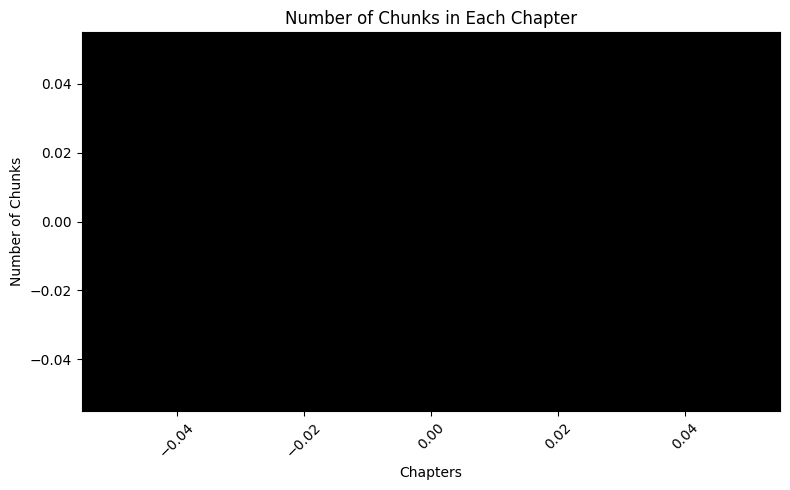

In [ ]:

# Function to analyze emotions for each chunk
def analyze_emotions_for_chunks(chapters_chunks):
    num_chunks_per_chapter = []  # List to store the number of chunks for each chapter

    for chapter, chunks in chapters_chunks.items():
        num_chunks = len(chunks)  # Calculate the number of chunks for each chapter
        num_chunks_per_chapter.append(num_chunks)
        #print(f"Chapter {chapter}: Number of Chunks = {num_chunks}")

    # Plotting the graph for number of chunks for each chapter with a black background
    plt.figure(figsize=(8, 5))
    plt.bar(chapters_chunks.keys(), num_chunks_per_chapter, color='skyblue')
    plt.xlabel('Chapters')
    plt.ylabel('Number of Chunks')
    plt.title('Number of Chunks in Each Chapter')
    plt.xticks(rotation=45)

    # Set the background color to black
    plt.gca().set_facecolor('black')

    plt.tight_layout()
    plt.show()

# Assuming chapters_chunks is the dictionary containing chunks for each chapter
analyze_emotions_for_chunks(chapters_chunks)


## Analysis

In [ ]:
# Load the emotion analysis model
emotion_analysis = pipeline('sentiment-analysis', model='j-hartmann/emotion-english-distilroberta-base')

In [ ]:

# Function to analyze emotions for each chunk and store the results
def analyze_emotions_for_chunks(chapters_chunks):
    chunks_emotions = {}

    for chapter, chunks in chapters_chunks.items():
        print(f"*** {chapter} ***")
        chapter_emotions = []

        # Analyze emotions for each chunk
        for i, chunk in enumerate(chunks, start=1):
            emotions_result = emotion_analysis(chunk)
            chapter_emotions.append(emotions_result)
            print(f"Chunk {i}: {emotions_result}")

        chunks_emotions[chapter] = chapter_emotions
        print()

    return chunks_emotions

# Store emotion analysis results for each chunk in a dictionary
chunks_emotions_data = analyze_emotions_for_chunks(chapters_chunks)

## VIsualize Results

In [ ]:

# Function to visualize emotions for chunks within each chapter using stored results
def visualize_emotions_for_chapters(chunks_emotions):
    for chapter, chunk_emotions in chunks_emotions.items():
        print(f"*** {chapter} ***")

        # Lists to store emotion scores for each chunk within the chapter
        emotions_data = {emotion: [] for emotion in ['anger', 'joy', 'sadness', 'surprise', 'fear', 'neutral', 'disgust']}

        # Retrieve stored emotion scores for each chunk
        for chunk_result in chunk_emotions:
            for emotion in emotions_data:
                emo_score = next((emo['score'] for emo in chunk_result if emo['label'] == emotion), 0.0)
                emotions_data[emotion].append(emo_score)

        # Create subplots for the line plot and the pie chart
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot line graph for each chapter
        for emotion, scores in emotions_data.items():
            ax1.plot(range(1, len(chunk_emotions) + 1), scores, marker='o', label=emotion.capitalize())

        ax1.set_xlabel('Chunks')
        ax1.set_ylabel('Emotion Score')
        ax1.set_title(f'Emotions in {chapter}')
        ax1.legend()

        # Find the overall dominant emotion for the chapter
        overall_emotion = Counter({emotion: sum(scores) for emotion, scores in emotions_data.items()})
        dominant_emotion = overall_emotion.most_common(1)[0][0]

        # Create a pie chart to visualize the dominant emotion
        ax2.pie(list(overall_emotion.values()), labels=list(overall_emotion.keys()), autopct='%1.1f%%', startangle=140)
        ax2.set_title(f'Dominant Emotion Distribution\nDominant Emotion: {dominant_emotion.capitalize()}')
        ax2.axis('equal')

        plt.tight_layout()
        plt.show()
        print()

# Visualize emotions for chunks within each chapter using stored results
visualize_emotions_for_chapters(chunks_emotions_data)

## Final Result

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Function to aggregate emotion scores across all chapters
def aggregate_emotion_scores(chunks_emotions):
    combined_emotions = defaultdict(float)

    for chapter, chunk_emotions in chunks_emotions.items():
        for chunk_result in chunk_emotions:
            for emo in chunk_result:
                combined_emotions[emo['label']] += emo['score']

    return combined_emotions

# Get aggregated emotion scores
aggregated_emotions = aggregate_emotion_scores(chunks_emotions_data)

# Find the dominant emotion
dominant_emotion = max(aggregated_emotions, key=aggregated_emotions.get)

# Plotting the pie chart for overall emotion distribution
plt.figure(figsize=(10, 6))

# Plot the pie chart for overall emotion distribution
labels = aggregated_emotions.keys()
sizes = aggregated_emotions.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Overall Emotion Distribution Across All Chapters')

# Highlight the dominant emotion
plt.annotate(f'Dominant Emotion: {dominant_emotion.capitalize()}', xy=(0.5, 0.5), xytext=(0.5, -1),
             fontsize=12, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()


ValueError: max() arg is an empty sequence